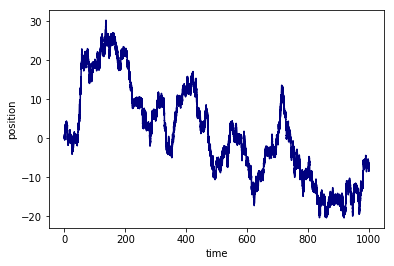

In [26]:
#Calculate Langevin trajectory in potential U=amplitude*sin(k*x)

#Import various libraries which might be useful for numerical calculations and plotting.

import numpy as np
import matplotlib.pyplot as plt
import math
import random
from tkinter import *
from array import *
import time
import datetime
import os


#Define a function which gives us the energy as
#a function of position
def energy(x,amplitude, k):
    energy = - amplitude*np.cos(k*x)

   
    return energy


# Set up the data we will need.

#Amplitude of potential
amplitude =1.0
#Wavenumber of potential 
k=2.0
#Initial position
x=0
#temperature *Boltzmann constant
kT=1.0
#set up fiction constant
friction =1.0
#set up mobility
mobility=1.0/friction
#set up small distance d for calculating derivative of
#the energy by first principles
d=0.0001
#reciprocal of d
d1=1.0/d
#size of each time step
dt=0.001
#calculate standard deviation of gaussian noise
sd = np.sqrt(2*kT/friction*dt)

#Number of time steps
timesteps=1000000


#Set up our random number generator with a given seed.
random.seed(157)
#Set up the initial position
x=0
#set upm initial time
time=0.0



#Make arrays to store the poistion time and potential.
stored_position=[]
stored_time=[]
stored_potential=[]


#Loop over the specified number of attempts.
#This will start at zero and finish at number_of_attempts-1.
for i in np.arange(0,timesteps):
    #calculate x step
    #first just do potential part
    #derivative of the potential is got from 1st principles
    dx= -mobility*dt*d1*(energy(x+d, amplitude, k)-energy(x, amplitude, k))
    #now add Gaussian noise
    #use Gaussian random number generator in python.
    dx =dx + np.random.normal(0.0, sd)
    
    #generate new x
    x=x+dx
    #generate new time
    time = time +dt
    #calculate potential
    potential=energy(x, amplitude, k)
    
    stored_position.append(x)
    stored_time.append(time)
    stored_potential.append(potential)
    
        
#Plot the spin versus the number of moves. 
plt.xlabel('time')
plt.ylabel('position')
plt.plot(stored_time,stored_position, color='navy' )
plt.show()



